In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import os
import pandas as pd
import scipy
import seaborn as sns
OUTDIR = "pdfs/"

Populating the interactive namespace from numpy and matplotlib


This notebook contains code to generate the following results from Zheng et al 2020:

* Figure 4: top k-mer comparison between cell types

In [2]:
GM_kmer_list = "/storage/pandaman/project/AgentBind-GM12878-analysis/results/c/STAT3+GM12878/kmer_ranking.txt"
CD_kmer_list_IM = "/storage/pandaman/project/AgentBind-IMPACT/results-c40/c/Stat3/kmer_ranking.txt" # Th17 from IMPACT
CD_kmer_list = "/storage/pandaman/project/AgentBind-Hela/results/c/STAT3+Th17/kmer_ranking.txt" # Th17 downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2545819
HL_kmer_list = "/storage/pandaman/project/AgentBind-Hela/results/c/STAT3+Hela/kmer_ranking.txt"

GM = pd.read_csv(GM_kmer_list, sep="\t", names=["kmer","pval_GM","OR_GM","weight_GM"], usecols=range(4))
CD = pd.read_csv(CD_kmer_list, sep="\t", names=["kmer","pval_C4","OR_C4","weight_C4"], usecols=range(4))
CD_IM = pd.read_csv(CD_kmer_list_IM, sep="\t", names=["kmer","pval_IM","OR_IM","weight_IM"], usecols=range(4))
HL = pd.read_csv(HL_kmer_list, sep="\t", names=["kmer","pval_HL","OR_HL","weight_HL"], usecols=range(4))

data = GM.merge(CD, on=["kmer"])
data = data.merge(CD_IM, on=["kmer"])
data = data.merge(HL, on=["kmer"])

def print_helper(lab1, lab2):
    print ("Top kmers for %s" %(lab2))
    print(data[(data["pval_%s"%lab1]>10e-5) & (data["pval_%s"%lab2]<10e-5)]\
          [["kmer","weight_%s"%lab1, "pval_%s"%lab1, "OR_%s"%lab1, "weight_%s"%lab2, "pval_%s"%lab2, "OR_%s"%lab2]]\
          .sort_values("pval_%s"%lab2).head(n=30))
    print ("=======")
    print ("Top kmers for %s" %(lab1))
    print(data[(data["pval_%s"%lab1]<10e-5) & (data["pval_%s"%lab2]>10e-5)]\
          [["kmer","weight_%s"%lab1, "pval_%s"%lab1, "OR_%s"%lab1, "weight_%s"%lab2, "pval_%s"%lab2, "OR_%s"%lab2]]\
          .sort_values("pval_%s"%lab1).head(n=30))
    print ("=======")
    print ("Top kmers for both")
    print(data[(data["pval_%s"%lab1]<10e-5) & (data["pval_%s"%lab2]<10e-5)]\
          [["kmer","weight_%s"%lab1, "pval_%s"%lab1, "OR_%s"%lab1, "weight_%s"%lab2, "pval_%s"%lab2, "OR_%s"%lab2]]\
          .sort_values("pval_%s"%lab1).head(n=30))

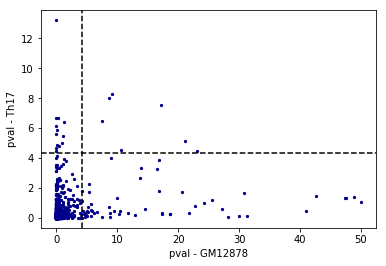

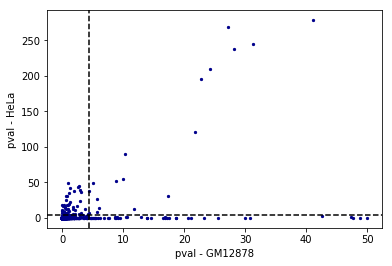

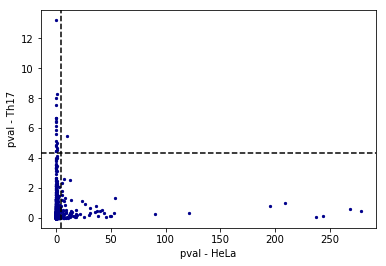

In [3]:
# GM vs. C4 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(-1*np.log10(data["pval_GM"]), -1*np.log10(data["pval_C4"]), color="darkblue", s=5)
ax.axvline(x=-1*np.log10(0.05/data.shape[0]), color="black", linestyle="dashed");
ax.axhline(y=-1*np.log10(0.05/data.shape[0]), color="black", linestyle="dashed");
ax.set_xlabel("pval - GM12878")
ax.set_ylabel("pval - Th17");
fig.savefig(os.path.join(OUTDIR, "GM_vs_C4_Stat3_kmers.pdf"))
#print_helper("GM", "C4")

# GM vs. Hela
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(-1*np.log10(data["pval_GM"]), -1*np.log10(data["pval_HL"]), color="darkblue", s=5)
ax.axvline(x=-1*np.log10(0.05/data.shape[0]), color="black", linestyle="dashed");
ax.axhline(y=-1*np.log10(0.05/data.shape[0]), color="black", linestyle="dashed");
ax.set_xlabel("pval - GM12878")
ax.set_ylabel("pval - HeLa");
fig.savefig(os.path.join(OUTDIR, "GM_vs_HL_Stat3_kmers.pdf"))
#print_helper("GM", "HL")

# G4 vs. Hela
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(-1*np.log10(data["pval_HL"]), -1*np.log10(data["pval_C4"]), color="darkblue", s=5)
ax.axvline(x=-1*np.log10(0.05/data.shape[0]), color="black", linestyle="dashed");
ax.axhline(y=-1*np.log10(0.05/data.shape[0]), color="black", linestyle="dashed");
ax.set_xlabel("pval - HeLa")
ax.set_ylabel("pval - Th17");
fig.savefig(os.path.join(OUTDIR, "C4_vs_HL_Stat3_kmers.pdf"))
#print_helper("C4", "HL")